# Special topics: xarray

`xarray` expands the utility of the time series analysis package `pandas` into more than one dimension. It is actively being developed so some functionality isn't yet available, but for certain analysis it is very useful.

Go ahead and install this package with `conda install xarray`.

We start with some motivation.

In [28]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import netCDF4
from mpl_toolkits.basemap import Basemap
import xarray as xr

In the previous material, we used `netCDF` directly to read in a data file, then access the data:

In [14]:
nc = netCDF4.Dataset('sst.mnmean.v4.nc')

print(nc['sst'].shape)

(1946, 89, 180)


However, as was pointed out in class, in this approach if we want to pull out the sea surface temperature data at a particular time, we need to first know which time index that particular time corresponds to. How can we find this?

First we convert the time numbers from the file into datetimes, like before:

In [17]:
# Extract the time variable using the convenient num2date
time = netCDF4.num2date(nc['time'][:], nc['time'].units)

Say we want to search for the time index corresponding to May 1, 1954.

In [25]:
from datetime import datetime

date = datetime(1954, 5, 1, 0, 0)

Now we search for the time index:

In [40]:
tind = np.where(time==date)[0][0]
print(tind)

1204


Great! So the time index we want is 1204. We can now make our sea surface temperature plot:

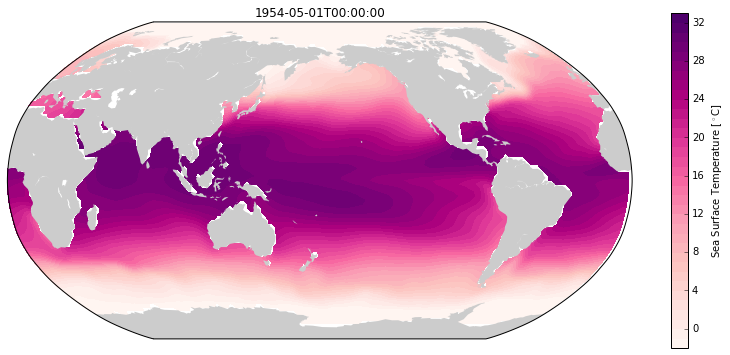

In [42]:
fig = plt.figure(figsize=(14,6))
m = Basemap(projection='robin', lon_0=180)
m.fillcontinents('0.8')
x, y = m(*np.meshgrid(nc['lon'], nc['lat']))
plt.contourf(x, y, nc['sst'][tind], np.arange(-2, 34), cmap='RdPu')
plt.title(time[tind].isoformat())
plt.colorbar().set_label(r'Sea Surface Temperature [$^\circ$C]')

What if instead we want the index corresponding to May 23, 1954, but there is no data at that exact time? Then what should we do?

In [52]:
date = datetime(1954, 5, 23, 0, 0)
np.where(time==date)

(array([], dtype=int64),)

---
### *Exercise*

> Search for the time index corresponding to the time in the data file closest to May 23, 1954.

---

Now let's access this data using a different package called `xarray`:

In [134]:
ds = xr.open_dataset('sst.mnmean.v4.nc')  # similar way to read in — also works for nonlocal data addresses
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, time: 1946)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 80.0 78.0 76.0 74.0 72.0 ...
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 ...
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 1854-03-01 ...
  * nbnds      (nbnds) int64 0 1
Data variables:
    time_bnds  (time, nbnds) float64 1.972e+04 1.975e+04 1.975e+04 1.978e+04 ...
    sst        (time, lat, lon) float64 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 ...
Attributes:
    history: created 10/2014 by CAS using NCDC's ERSST V4 ascii values
    title: NOAA Extended Reconstructed Sea Surface Temperature (ERSST), Version 4 (in situ only)
    climatology: Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.
    description: In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present

Now we can search for data in May 1954

In [113]:
ds['sst'].sel(time=slice('1954-05','1954-06'))

<xarray.DataArray 'sst' (time: 2, lat: 89, lon: 180)>
array([[[-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995],
        [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995],
        [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995],
        ..., 
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995],
        [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995],
        [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
         -1.79999995, -1.79999995],
        ...,

In [118]:
ds['sst'].sel(time='1954-05-23', method='nearest')

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
        -1.79999995, -1.79999995],
       [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
        -1.79999995, -1.79999995],
       [-1.79999995, -1.79999995, -1.79999995, ..., -1.79999995,
        -1.79999995, -1.79999995],
       ..., 
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 78.0 76.0 74.0 72.0 70.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
    time     datetime64[ns] 1954-06-01
Attributes:
    long_name: Monthly Means of Sea Surface Temperature
    units: degC
    var_desc: Sea Surface Temperature
    l

We can see from the printed meta data that there is a single data time in May 1954. So, let's plot it!

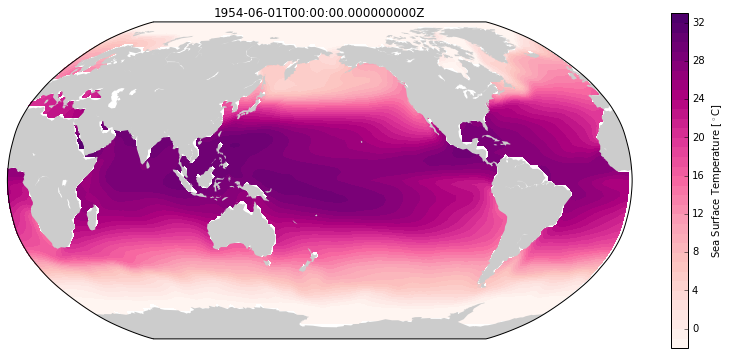

In [170]:
sst = ds['sst'].sel(time='1954-05-23', method='nearest')

fig = plt.figure(figsize=(14,6))
m.fillcontinents('0.8')
plt.contourf(x, y, sst, np.arange(-2, 34), cmap='RdPu')
plt.title(sst.time.data)
plt.colorbar().set_label(r'Sea Surface Temperature [$^\circ$C]')

Note that you can also just plot against the included coordinates with built-in convenience functions:

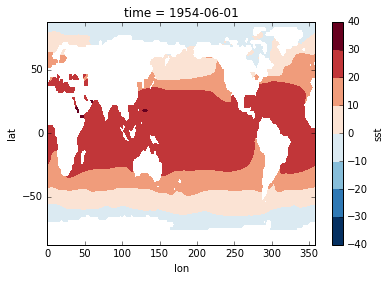

In [130]:
sst.plot.contourf()

## GroupBy

Let's group by season and save a new file.

In [171]:
seasonal_mean = ds.groupby('time.season').mean('time')
seasonal_mean

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, season: 4)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 80.0 78.0 76.0 74.0 72.0 ...
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 ...
  * nbnds      (nbnds) int64 0 1
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst        (season, lat, lon) float64 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 ...
    time_bnds  (season, nbnds) float64 4.937e+04 4.94e+04 4.931e+04 ...

Do you remember how many lines of code were required to save a netCDF file from scratch? It is straight-forward, but tedious. Once you are working with data using `xarray`, you can save new, derived files very easily from your data array:

In [148]:
seasonal_mean.to_netcdf('test.nc')

In [172]:
d = netCDF.Dataset('test.nc')
d

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lat(89), lon(180), season(4), nbnds(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 sst(season,lat,lon), float64 time_bnds(season,nbnds), <class 'str'> season(season)
    groups: 

---
### *Exercise*

> Plot the difference between summer and winter mean sea surface temperature.

---